<a href="https://colab.research.google.com/github/crismaque/Se-nales_y_Sistemas_2023_II/blob/main/PARCIAL%20_2/Parcial2_Cristian_Marcelo_Quenguan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1

1. Encuentre la expresion del espectro de Fourier (forma exponencial y trigonométrica) para la señal $x(t)=|6sen(3t+\frac{\pi}{4})|^2$
, con $t ∈ [−π, π]$. Presente las simulaciones respectivas para graficar el espectro y la reconstrucción de la senal en función del número de armónicos y el error relativo.

Para iniciar graficamos la señal que va a ser representada junto con su equivalente que fue usada en los calculos teóricos. Observamos que es una señal con simetría impar.

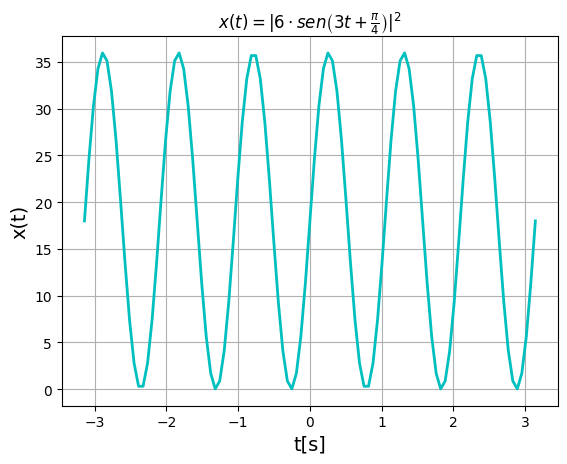

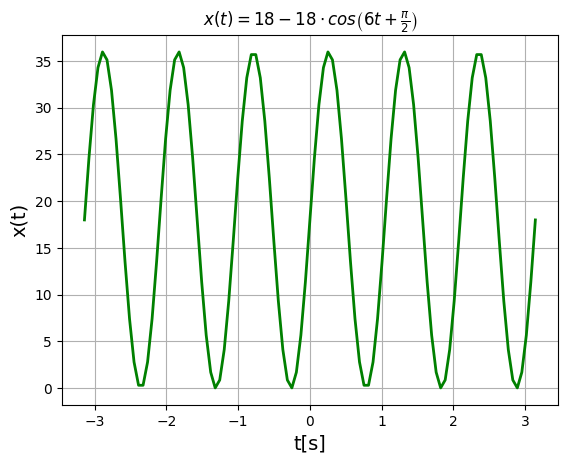

In [587]:
#importamos librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

T = 2*np.pi # segundos de gráfica, periodo de la señal
Fo = 1/T #frecuencia de la señal
Fs = 100*Fo # frecuencia de muestreo definida
tv = np.arange(-T/2,T/2,1/Fs) #vector de tiempo generado
Nm = len(tv) #numero de muestras requeridas

#ingresamos la señal x(t)=|6sen(3t+π/4)|^2
xo = (np.abs(6*np.sin(3*tv+(np.pi/4))))**2

#graficar señal original
plt.plot(tv,xo,'c',linewidth=2)
plt.grid()
plt.title(r'$x(t)=|6 \cdot sen \left(3t+ \frac{\pi}{4}\right)|^2$')
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()


#ingresamos la señal x(t)=18-18cos(6t+π/2) para comprobar que son iguales
x2 = 18-18*np.cos(6*tv+ np.pi/2)

#graficar señal
plt.plot(tv,x2,'g',linewidth=2)
plt.grid()
plt.title(r'$x(t)=18-18\cdot cos\left(6t+ \frac{\pi}{2}\right)$')
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

Definímos el número de armónicos con los que representaremos la señal ($N=16$ por lo que tendremos un total de $2\cdot N+1=33$) y calculamos las bases en la seríe exponencial compleja

In [588]:
N = 16 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((Nm,2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

In [589]:
# graficar bases
from ipywidgets import interact,IntSlider
fig, ax = plt.subplots(1, 1,figsize=(6,3))
def pltbase(n=1):

    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gcf().set_figwidth(6)
    plt.gcf().set_figheight(3)
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=16, min=-16), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

Le asignamos su valor de espectro a los armónicos de intéres, que para nuestro caso son: $n=-6,n=-6$ y $n=0$ (nivel dc). Para el resto de armónicos su valor es $0$.

In [590]:
#calcular espectro en serie exponencial compleja
Cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
Cn[N-6] = 9j #armónico -6
Cn[N+6] = -9j #armónico +6
Cn[N] = 18 # nivel dc C_0

Graficamos la parte real e imaginaria del espectro, también su representación en el diágrama de Bode (magnitud y fase). Vemos que resaltan los armónicos; $n=0,n=-6$ y $n=6$, cuyo valor espectral es diferete de $0$.

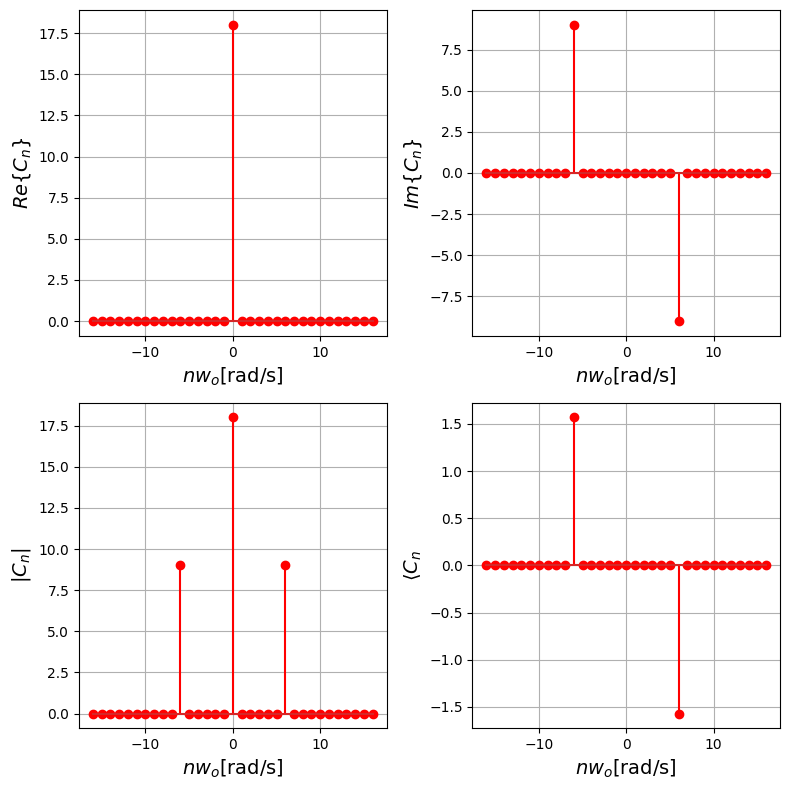

In [591]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

Se incluye el cálculo del error en la representación de la señal, habiendo calculado la potencia de la señal $P_{x}=486$ y sabiendo que en la serie exponencial compleja de Fourier $P_{e}=1$. Notamos que en el armónico $Na=6$ el error es $0\%$ lo que muestra que se logró una representación perfecta de la señal.

In [592]:
Px = 486 # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,xo,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=16, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

Finalmente se incluye un ambiente animado de la representación de la señal, su representación en la parte real e imaginaria y el diagrama de Bode de su espectro.

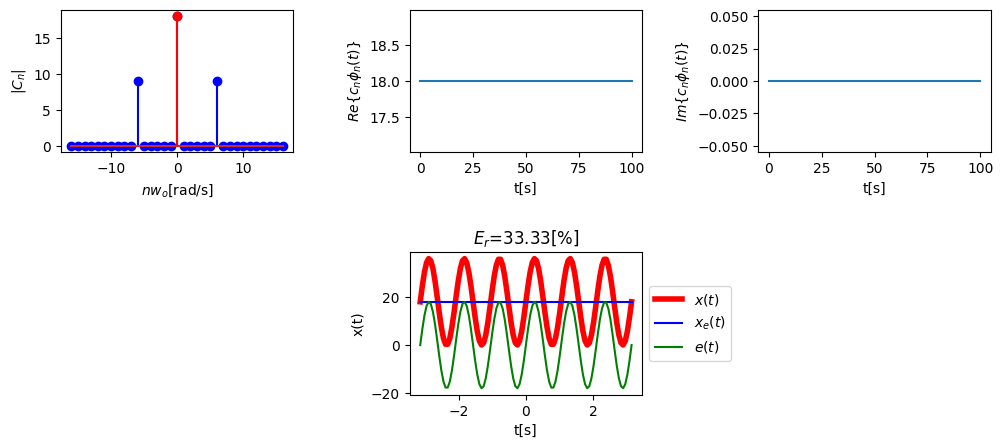

In [593]:
#figura y axes animaciónx
fig, ax = plt.subplots(2, 3,figsize=(12,5))
#función para gráfico interactivo
def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')




    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    #error en t
    et = xo - xe

    ax[1,1].plot(tv,xo,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

In [594]:
anim

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Punto 2

2.  Sea la señal portadora $c(t) = A_{c}cos(2πFct)$, con $Ac, Fc ∈
R$, y la señal mensaje $m(t) ∈ R$. Encuentre el espectro en frecuencia de la señal modulada en amplitud $(AM)$, $y(t) = \left(1+\frac{m(t)}{A_c}\right)c(t)$. Luego, descargue desde YouTube,
5 segundos de su cancion favorita (capturando del segundo 20 al 25). Presente una simulación de modulación por amplitud $AM$ (tomando como mensaje el fragmento de la canción escogida y con un índice de modulacion de 1). Grafique las senales en tiempo y frecuencia (magnitud) de la señal mensaje, portadora y modulada. Reproduzca los fragmentos de
audio del mensaje, portadora y señal modulada. Nota: se sugiere utilizar un canal de senal de audio para el desarrollo del ejercicio.

Usamos la API youtube-dl para descargar un video de youtube y extraer el audio en formato mp3.

In [595]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (139 kB)
  Using cached idna-3.4-py3-none-a

Incluimos el link del video que usaremos.

In [596]:
link="https://www.youtube.com/watch?v=3-reCGjm7R8"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=3-reCGjm7R8
[youtube] 3-reCGjm7R8: Downloading webpage
[youtube] 3-reCGjm7R8: Downloading ios player API JSON
[youtube] 3-reCGjm7R8: Downloading android player API JSON
[youtube] 3-reCGjm7R8: Downloading m3u8 information
[info] 3-reCGjm7R8: Downloading 1 format(s): 251
[download] audio.mp3 has already been downloaded
[ExtractAudio] Not converting audio audio.mp3; file is already in target format mp3


Se convierte el audio descargado en .wav

In [597]:
!ffmpeg -y -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

Libreria para manipulación de archivos de audio

In [598]:
!pip install soundfile

Se extraen datos necesarios de la canción (Frecuencia y contenido).

In [599]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


Creamos la señal mensaje que va del segundo 20 al 25 de la canción que descargamos.

In [600]:
xpro = xa.copy() #copiar archivos para procesar
#5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

Reproducimos la señal mensaje.

In [601]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

Graficamos la señal mensaje en función del tiempo

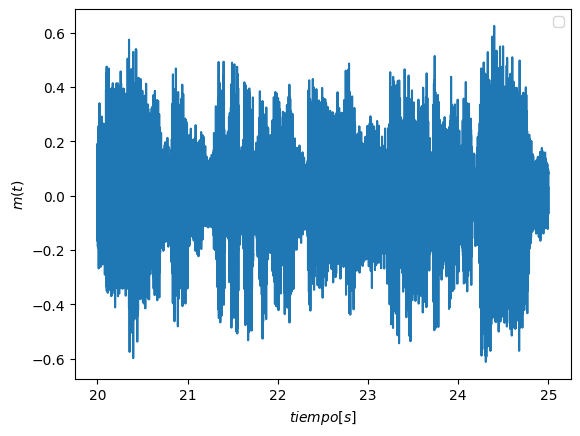

In [632]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.legend()
plt.show()

Calculamos la transformada de Fourier de la señal mensaje con lo que obtenemos su vector de frecuencias.

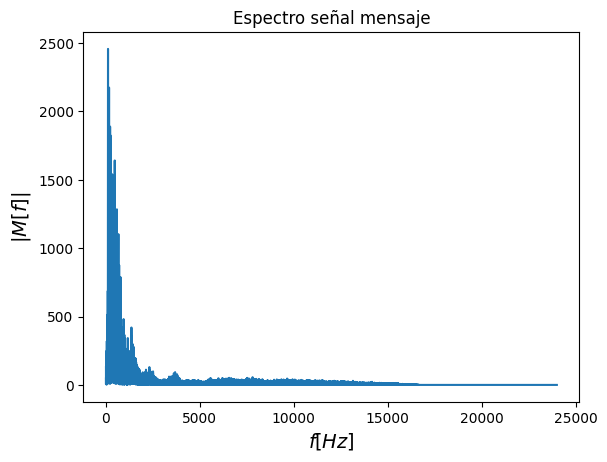

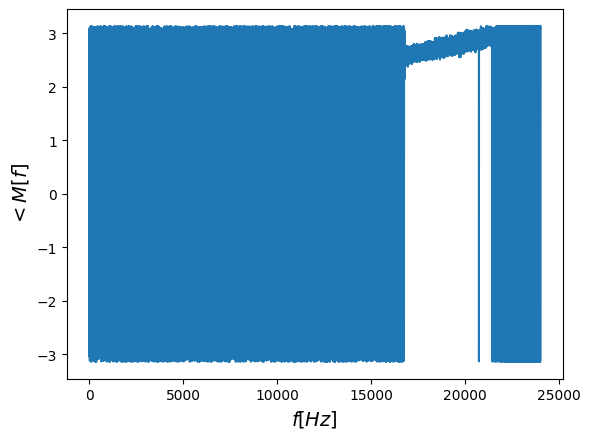

In [633]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

Creamos la señal portadora recordando que la frecuencia de esta señal debe ser mayor a la frecuencia máxima de la señal mensaje.

In [640]:
Fc = 25000 #frecuencia portadora
Im = 1 # Índice de modulación
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*tt) #portadora

Se reproduce la señal portadora.

In [641]:
Audio(c,rate=fs)

Graficamos esta señal portadora.

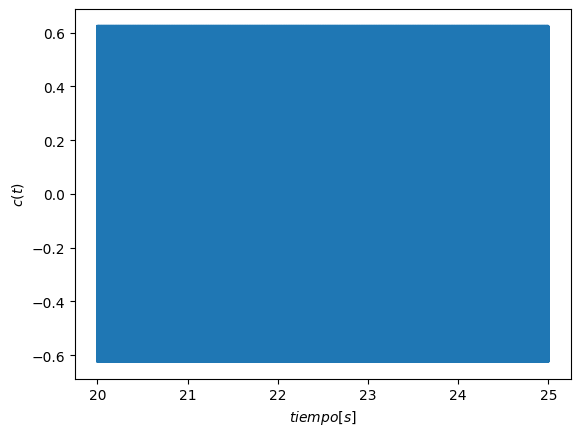

In [642]:
#Señal portadora en tiempo
plt.plot(tt,c) #graficar señal portadora en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

Calculamos la transformada de Fourier de la señal portadora y obtenemos su vector de frecuencias.

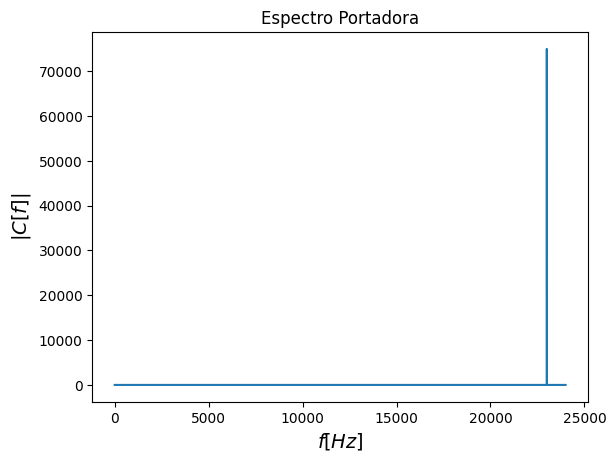

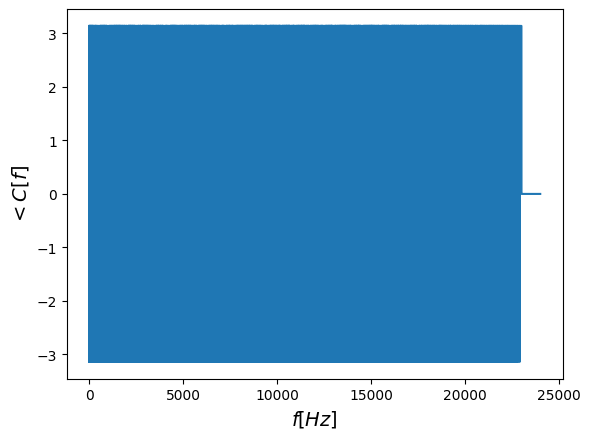

In [643]:
Cw = np.fft.rfft(c) # Transformada rápida (real) de Fourier a la señal portadora (c)
plt.plot(vf,abs(Cw)) # Se plotea la magnitud respecto al vector de frecuencias creado anteriormente
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Cw)) # Fase vs Frecuencia
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [645]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [646]:
#repoducir modulada
Audio(y,rate=fs)

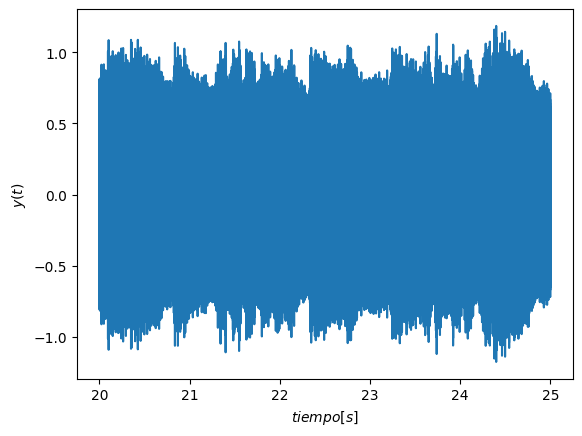

In [647]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

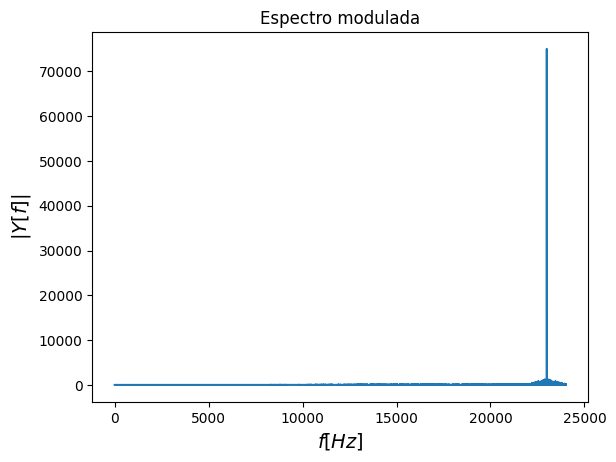

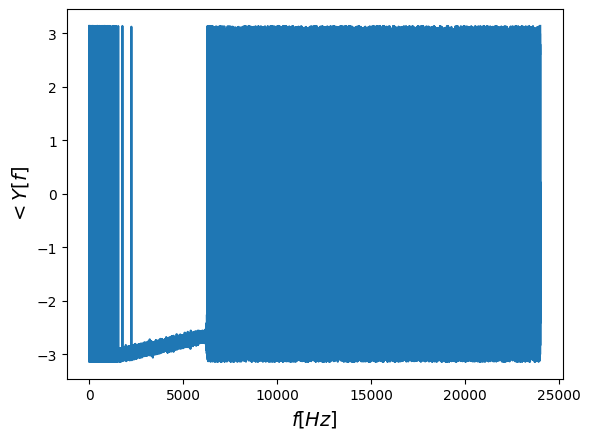

In [648]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

# Punto 3

In [ ]:
#data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir

In [613]:
#librerias
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

#cargar datos
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

In [614]:
Xt = dicX['F'] #datos en el tiempo
Fs = 12000 #frecuencia de muestreo
Tl = Xt.shape[1]/Fs #tamaño del segmento
print('Xt shape:',Xt.shape)
print('tiempo [s]', Tl)

Y = dicX['E']
Ytrue = Y[:,2] #clases fallos en los rodamientos

labels_ = ['NOR','IR1_0.007','IR1_0.014','IR1_0.021',
           'IR2_0.007','IR2_0.014','IR2_0.021',
           'BE_0.007','BE_0.014','BE_0.021'
           ] #nombres de las clases

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333


In [615]:
print(Ytrue.shape) #etiqueta membresia de los datos 10 posibles valores
print(np.unique(Ytrue))

(1200,)
[ 1  2  3  4  5  6  7  8  9 10]


In [616]:
#partir datos para train y test
Xtrain, Xtest, Ytrain, _ = train_test_split(Xt, Ytrue, test_size=0.3)

print(f"Xtrain shape {Xtrain.shape}, Ytrain shape {Ytrain.shape }Xtest shape {Xtest.shape} ")

Xtrain shape (840, 4000), Ytrain shape (840,)Xtest shape (360, 4000) 


In [617]:
#calcular espectro de Fourier Xtrain que es la base de datos de las fallas de motores
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) #freq vector
Xw = (abs(np.fft.rfft(Xtrain))) # FFT
Xw.shape

(840, 2001)

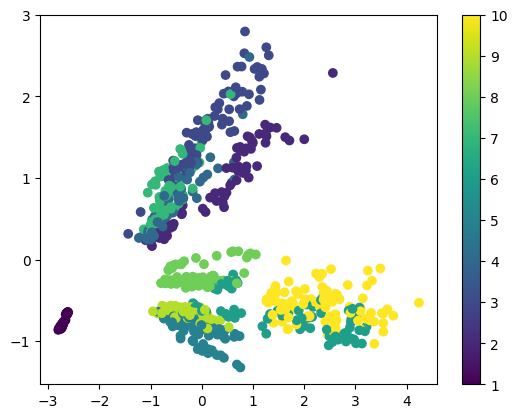

In [618]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain') #se gráfica la dispersión de las de las clases representativas
plt.colorbar()
plt.show()

* Graficamos Xtrain y Xtest en función del tiempo

In [619]:
tv = np.arange(0, Tl,1/Fs) #generamos el vector tiempo

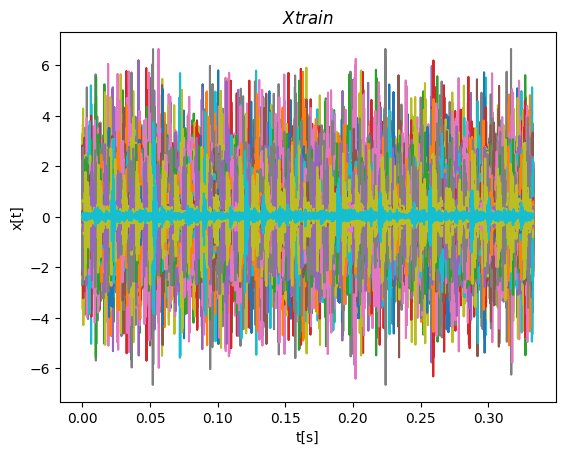

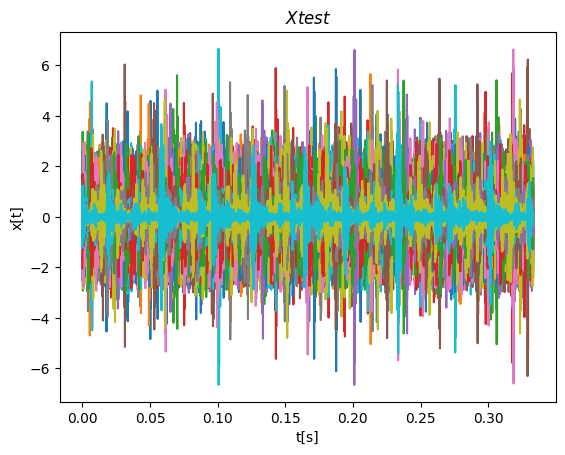

In [620]:
#graficamos Xtrain y Xtest en función del tiempo
plt.plot(tv,Xtrain.T) #Xtrain
plt.title(r'$Xtrain$')
plt.xlabel(r't[s]')
plt.ylabel(r'x[t]')
plt.show()

plt.plot(tv,Xtest.T) #Xtest
plt.title(r'$Xtest$')
plt.xlabel(r't[s]')
plt.ylabel(r'x[t]')
plt.show()

* Espectro de Fourier para Xtest y Xtrain

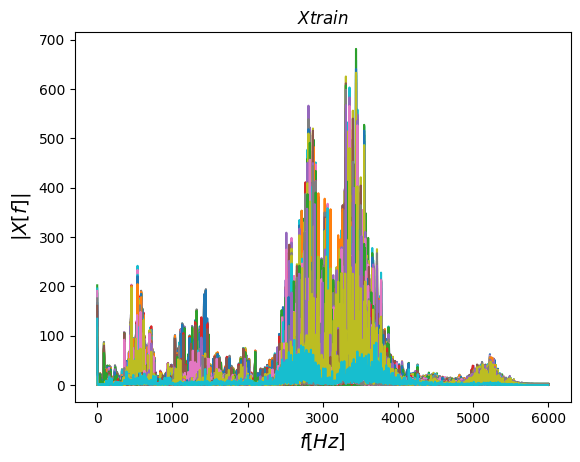

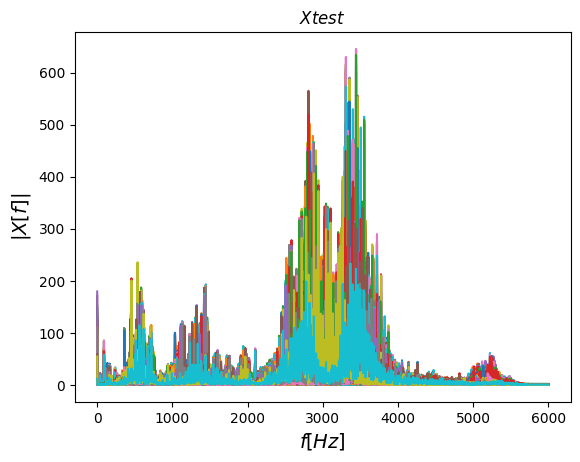

In [621]:
plt.plot(vf,Xw.T)
plt.title(r'$Xtrain$')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[f]|$',fontsize = 14)
plt.show()

#calcular espectro de Fourier Xtest que son las pruebas que se clasificaran segun su daño
vf2 = np.fft.rfftfreq(Xtest.shape[1],1/Fs) #freq vector
Xw2 = (abs(np.fft.rfft(Xtest))) # FFT

plt.plot(vf2,Xw2.T)
plt.title(r'$Xtest$')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|X[f]|$',fontsize = 14)
plt.show()

* Graficas de la señal promedio de los fallos en el tiempo y en la frecuencia

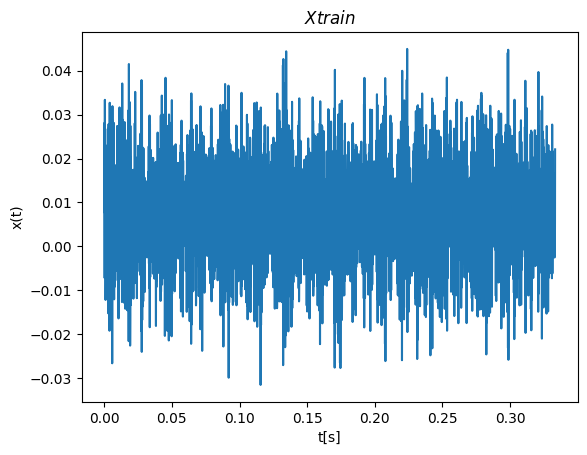

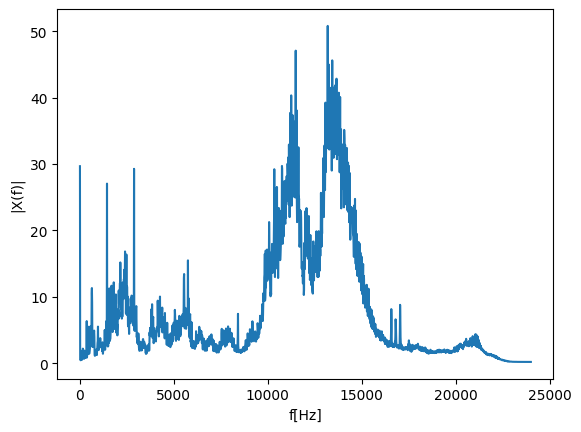

In [622]:
#grafica tiempo y fourier
vfp = np.fft.rfftfreq(Xtrain.shape[1],1/fs) #calculo vector de frecuencias
Xwp = np.fft.rfft(Xtrain, axis=1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales

plt.plot(tv, Xtrain.mean(axis=0).T)
plt.title(r'$Xtrain$')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

plt.plot(vfp, abs(Xwp).mean(axis=0).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

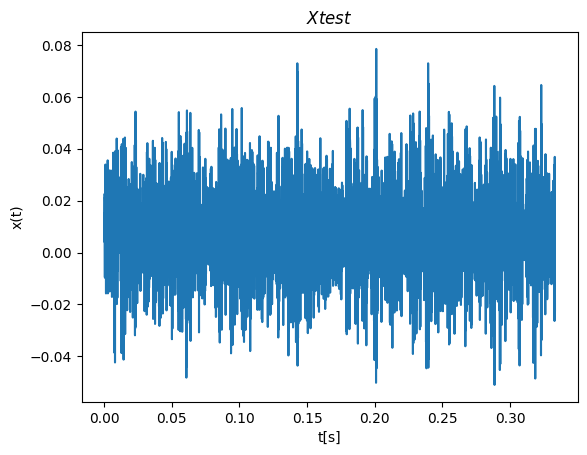

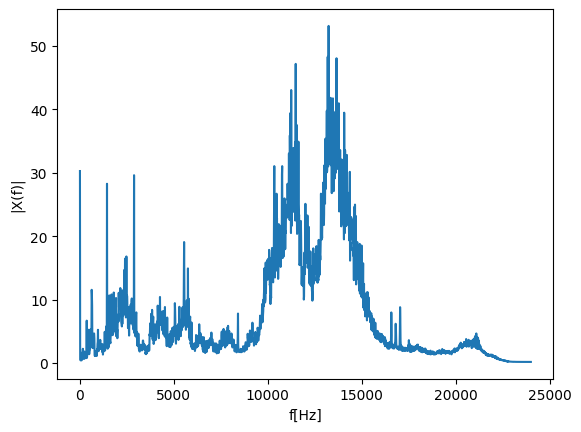

In [623]:
#grafica tiempo y fourier
vf2p = np.fft.rfftfreq(Xtest.shape[1],1/fs) #calculo vector de frecuencias
Xw2p = np.fft.rfft(Xtest, axis=1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales

plt.plot(tv, Xtest.mean(axis=0).T)
plt.title(r'$Xtest$')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

plt.plot(vf2p, abs(Xw2p).mean(axis=0).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

* Se normalizan los espectros entre 0 y 1 para evitar inconsistencias por amplitudes máximas

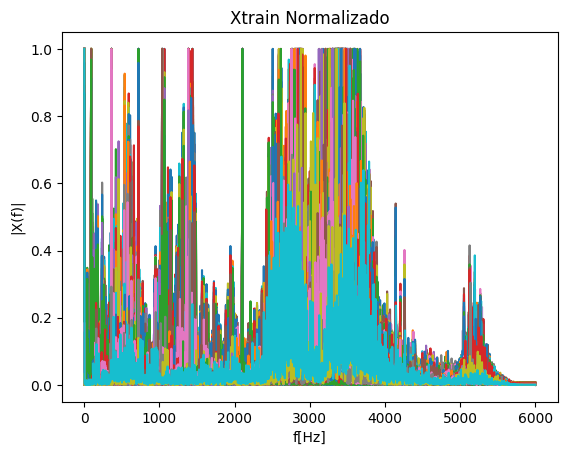

In [624]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(Xw.T).T

plt.plot(vf, Xw_.T)
plt.title('Xtrain Normalizado')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

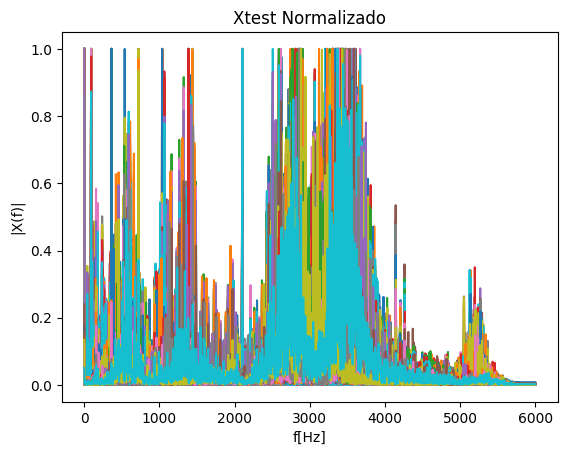

In [625]:
sca = MinMaxScaler()
Xw2_ = sca.fit_transform(Xw2.T).T

plt.plot(vf,Xw2_.T)
plt.title('Xtest Normalizado')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

* Detección de fallos
\
Ya que tenemos las componenetes espectrales de Xtrain y Xtest calculamos la distancia entre sus componentes espectrales, y se almacenan en un vector que busque el valor mínimo y encontrar el tipo de fallo al que corresponda

In [626]:
from scipy.spatial.distance import cdist

valor = []

for i in range(len(Xtest)):
    distance = cdist(Xw2_, Xw_) #se calcula para las componentes espectrales normalizadas
    valor.append(Ytrain[np.argmin(distance[i,])])

Se muestra el resultado de los fallos, tipo de fallo, número de motor que se analizó y cuantos fallos hubo por cada tipo

In [627]:
i = 1
recount = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0}
for result in valor:
    print(f'El motor {i} presenta un error del tipo: {labels_[result-1]}')
    recount[str(result)] += 1
    i += 1

El motor 1 presenta un error del tipo: BE_0.021
El motor 2 presenta un error del tipo: IR1_0.007
El motor 3 presenta un error del tipo: IR1_0.014
El motor 4 presenta un error del tipo: BE_0.021
El motor 5 presenta un error del tipo: IR2_0.021
El motor 6 presenta un error del tipo: BE_0.021
El motor 7 presenta un error del tipo: BE_0.007
El motor 8 presenta un error del tipo: IR1_0.021
El motor 9 presenta un error del tipo: IR1_0.021
El motor 10 presenta un error del tipo: BE_0.007
El motor 11 presenta un error del tipo: IR2_0.007
El motor 12 presenta un error del tipo: IR2_0.014
El motor 13 presenta un error del tipo: IR1_0.014
El motor 14 presenta un error del tipo: IR1_0.014
El motor 15 presenta un error del tipo: BE_0.014
El motor 16 presenta un error del tipo: BE_0.007
El motor 17 presenta un error del tipo: IR1_0.021
El motor 18 presenta un error del tipo: BE_0.007
El motor 19 presenta un error del tipo: IR1_0.007
El motor 20 presenta un error del tipo: IR2_0.014
El motor 21 prese

Se muestra el número de fallos por categoria

In [628]:
print(f'El total de fallos por categoría fue:\n')
i = 0
for fault in recount.keys():
    print(f'{labels_[int(fault)-1]}: {recount[fault]}')
    i += int(recount[fault])

print(f'\nFallos totales: {i}')

El total de fallos por categoría fue:

NOR: 36
IR1_0.007: 32
IR1_0.014: 39
IR1_0.021: 43
IR2_0.007: 43
IR2_0.014: 40
IR2_0.021: 34
BE_0.007: 39
BE_0.014: 27
BE_0.021: 27

Fallos totales: 360
